#### MACHINE LEARNING

Andeo, Lovely\
2020-05405\
FX-2

**Activity 8.1 Perceptron**

1. Using your fruit feature data, take 2 classes at a time and compute the decision surface between the two classes using the perceptron algorithm.
2. Plot your data in feature space and overlay the decision line. To draw the decision line, note that an alternative form of the equation of the line is given by:\
$Ax + By = C$ or  $-C + Ax + By = 0$\
In terms of slope and y-intercept form, $y=\dfrac{C}{B}-\dfrac{A}{B}x$ where $m=-\dfrac{A}{B}$ and $b = \dfrac{C}{B}$.\
The product of inputs and weights make up an equation of the line: $w_0 +w_1x_1 +w_2x_2 =0$ (note: $x_0 =1$). With $C=-w_0$, $A=w_1$, and $B=w_2$ the decision line will have a slope $m=-w_1/w_2$ and y-intercept $b=-w_0/w_2$.
3. If there are more than two classes, compute another decision line for the other pair of classes.
4. You can now test your perceptron if it can classify fruits. Using $w_0 +w_1x_1 +w_2x_2 =0$ enter features of an unclassified fruit in x1 and x2. If the result of the equation is greater than 0 (positive) then the feature point is above the decision line so the fruit belongs to class 1, if negative then the feature point is below the decision line thus the fruit belongs to class 2.



In [47]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import erosion, dilation, closing, opening
from sklearn.model_selection import train_test_split


https://studylib.net/doc/25382059/smart-fruit-classification-using-neural-networks

https://www.kaggle.com/datasets/ishandandekar/fruitimagedataset



In [53]:
import os
import pandas as pd
import colorsys

folder_path = "Training"  # Folder name
master_df = pd.DataFrame()  # Master DataFrame to store all the features

def extract_features_hue(folder_path, lower_threshold, upper_threshold, element, operation1, operation2):
    global master_df  # Declare master_df as a global variable
    
    # Iterate over subfolders
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        # Check if the subfolder is a directory
        if os.path.isdir(subfolder_path):
            # Iterate over images in the subfolder
            for image_file in os.listdir(subfolder_path):
                if image_file == ".DS_Store":
                    continue  # Skip .DS_Store file
                
                image_path = os.path.join(subfolder_path, image_file)
                
                try:
                    I = Image.open(image_path)
                    I_gray = I.convert('L')
                except (OSError, UnidentifiedImageError):
                    print(f"Error processing image: {image_path}")
                    continue  # Skip unreadable or non-image files
                
                # Specifying the range values for the threshold
                threshold_range = (lower_threshold, upper_threshold)

                # Thresholding the image within the range
                BW = np.logical_and(np.array(I_gray) > threshold_range[0], np.array(I_gray) < threshold_range[1])
                seg = operation2(operation1(BW, element), element)
                labeled_image = label(seg)
                
                # Displaying the properties or features as a table
                properties = ['eccentricity', 'area']
                df = pd.DataFrame(regionprops_table(labeled_image, properties=properties))

                # Calculate HSV color space values for each region
                hue_values = []
                image_array = np.array(I)
                for region in regionprops(labeled_image):
                    region_pixels = image_array[region.coords]
                    r, g, b = np.mean(region_pixels[:, :, 0]), np.mean(region_pixels[:, :, 1]), np.mean(region_pixels[:, :, 2])
                    hsv = colorsys.rgb_to_hsv(r / 255.0, g / 255.0, b / 255.0)
                    hue_values.append(hsv[0])

                df['Hue'] = hue_values
                df['label'] = subfolder

                # Append the current image's DataFrame to the master DataFrame
                master_df = master_df.append(df, ignore_index=True)

# Define the structuring element
element = np.array([[0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 1, 0],
                    [0, 0, 1, 1, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0]])

# Extract features for all images in the folder
extract_features_hue(folder_path, 0, 240, element, closing, opening)

# Display the master DataFrame with all the features
print(master_df)

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

     eccentricity  area       Hue  label
0        0.496187  7028  0.061626  Apple
1        0.505773  7281  0.066365  Apple
2        0.452883  7103  0.068490  Apple
3        0.457525  7144  0.071028  Apple
4        0.250920  8136  0.062074  Apple
..            ...   ...       ...    ...
424      0.381816  7401  0.622598  Peach
425      0.454510  7244  0.175626  Peach
426      0.386021  7841  0.071068  Peach
427      0.407731  7659  0.163983  Peach
428      0.303660  8033  0.087505  Peach

[429 rows x 4 columns]


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_15435/498600399.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [49]:
# fruit_df show have the names of the fruit and features

fruit_classes = {
    'Apple': 0,
    'Banana': 1
}

master_df['class'] = master_df['label'].map(fruit_classes)
X = master_df[['Hue', 'eccentricity']].values
y = master_df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

class Perceptron:
    
    def __init__(self, weights, learning_rate=0.1):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, target_result, calculated_result, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
# Initialize the perceptron
p = Perceptron(weights=[0.1, 0.5], learning_rate=0.1)

# Training loop
for index in range(len(X_train)):
    p.adjust(y_train[index], p(X_train[index]), X_train[index])

# Evaluation on training data
evaluation_train = p.evaluate(X_train, y_train)
print("Training data evaluation:", evaluation_train.most_common())

# Evaluation on test data
evaluation_test = p.evaluate(X_test, y_test)
print("Test data evaluation:", evaluation_test.most_common())

# Final weights
print("Final weights:", p.weights)


Training data evaluation: [('wrong', 226), ('correct', 117)]
Test data evaluation: [('wrong', 63), ('correct', 23)]
Final weights: [nan nan]


IndexError: index 2 is out of bounds for axis 0 with size 2

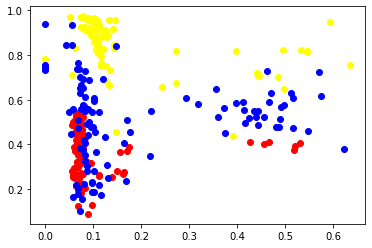

In [51]:
# Plotting the fruits and decision boundary
fig, ax = plt.subplots()

# Plot apples
apples = master_df[master_df['class'] == 0]
ax.scatter(apples['Hue'], apples['eccentricity'], color='red', label='Apples')

# Plot bananas
bananas = master_df[master_df['class'] == 1]
ax.scatter(bananas['Hue'], bananas['eccentricity'], color='yellow', label='Bananas')

# Plot other fruits
other_fruits = master_df[~master_df['class'].isin([0, 1])]
ax.scatter(other_fruits['Hue'], other_fruits['eccentricity'], color='blue', label='Other Fruits')

# Plot decision boundary
x_decision = np.linspace(0, 1, 100)
y_decision = (-p.weights[0] * x_decision - p.weights[2]) / p.weights[1]
ax.plot(x_decision, y_decision, 'g-', linewidth=2, label='Decision Boundary')

ax.legend()
ax.grid()
plt.xlabel('Chromaticity')
plt.ylabel('Eccentricity')
plt.title('Fruit Classification')
plt.show()

______________________________________________________________

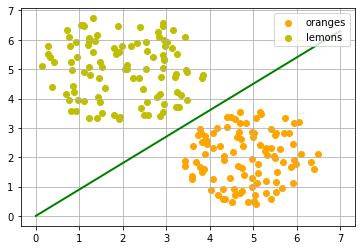

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius, 
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x, 
           oranges_y, 
           c="orange", 
           label="oranges")
ax.scatter(lemons_x, 
           lemons_y, 
           c="y", 
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
import random

oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons, 
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res    
print(train_data[:10], train_labels[:10])


[(4.7449913576173195, 1.6335410051003871), (3.438799595543567, 1.882222092313063), (4.578595724136734, 3.297776726032195), (0.7931898209208179, 5.797612544107045), (5.859939434508393, 1.6813756361136154), (5.527660436128403, 0.829558994964595), (6.104889329362869, 2.1231588615875516), (5.52442483945243, 2.8311616771861616), (0.3819881256950366, 4.403124831296231), (4.991765071180262, 2.6999163070970127)] [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


In [25]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 learning_rate=0.01):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    # activation function:
    @staticmethod
    def unit_step_function(x):
        if  x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
                

p = Perceptron(weights=[0.5, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index], 
             p(train_data[index]), 
             train_data[index])
    
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())

print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.9760421   2.32380075]


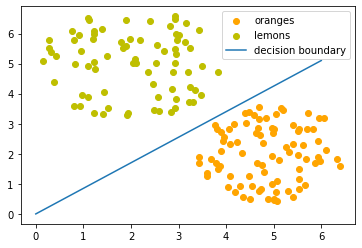

[-1.9760421   2.32380075]


In [26]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange", label = 'oranges')
ax.scatter(lemons_x, lemons_y, c="y", label = 'lemons')

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

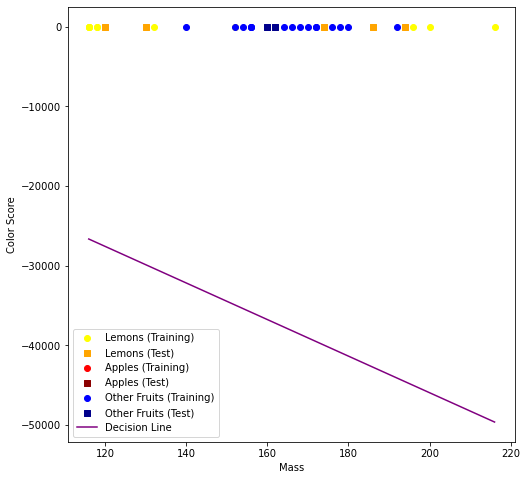

In [60]:
A = perceptron.weights[0]
B = perceptron.weights[1]
C = perceptron.bias
slope = -A / B
intercept = C / B

plt.figure(figsize=(8, 8))

# Scatter plot for lemons (class 1)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='yellow', label='Lemons (Training)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='orange', marker='s', label='Lemons (Test)')

# Scatter plot for apples (class 4)
plt.scatter(X_train[y_train == 4, 0], X_train[y_train == 4, 1], c='red', label='Apples (Training)')
plt.scatter(X_test[y_test == 4, 0], X_test[y_test == 4, 1], c='darkred', marker='s', label='Apples (Test)')

# Scatter plot for other fruits (class 2 and class 3)
plt.scatter(X_train[(y_train != 1) & (y_train != 4), 0], X_train[(y_train != 1) & (y_train != 4), 1], c='blue', label='Other Fruits (Training)')
plt.scatter(X_test[(y_test != 1) & (y_test != 4), 0], X_test[(y_test != 1) & (y_test != 4), 1], c='darkblue', marker='s', label='Other Fruits (Test)')

x_decision = np.linspace(np.min(np.concatenate([X_train[:, 0], X_test[:, 0]])), np.max(np.concatenate([X_train[:, 0], X_test[:, 0]])), num=100)
y_decision = slope * x_decision + intercept
plt.plot(x_decision, y_decision, color='purple', label='Decision Line')

plt.xlabel('Mass')
plt.ylabel('Color Score')
plt.legend()
plt.show()


In [ ]:
# fruit_df show have the names of the fruit and features

fruit_classes = {
    'Apple': 0,
    'Banana': 1
}

fruit_df['Class'] = fruit_df['Fruit'].map(fruit_classes)

from sklearn.model_selection import train_test_split

X = fruit_df[['Chromaticity', 'Eccentricity']].values
y = fruit_df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

class Perceptron:
    
    def __init__(self, weights, learning_rate=0.01):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
     
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, target_result, calculated_result, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction 
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
# Initialize the perceptron
p = Perceptron(weights=[0.5, 0.1], learning_rate=0.3)

# Training loop
for index in range(len(X_train)):
    p.adjust(y_train[index], p(X_train[index]), X_train[index])

# Evaluation on training data
evaluation_train = p.evaluate(X_train, y_train)
print("Training data evaluation:", evaluation_train.most_common())

# Evaluation on test data
evaluation_test = p.evaluate(X_test, y_test)
print("Test data evaluation:", evaluation_test.most_common())

# Final weights
print("Final weights:", p.weights)


In [ ]:
# Plotting the fruits and decision boundary
fig, ax = plt.subplots()

# Plot apples
apples = fruit_df[fruit_df['Class'] == 0]
ax.scatter(apples['Chromaticity'], apples['Eccentricity'], color='red', label='Apples')

# Plot bananas
bananas = fruit_df[fruit_df['Class'] == 1]
ax.scatter(bananas['Chromaticity'], bananas['Eccentricity'], color='yellow', label='Bananas')

# Plot other fruits
other_fruits = fruit_df[~fruit_df['Class'].isin([0, 1])]
ax.scatter(other_fruits['Chromaticity'], other_fruits['Eccentricity'], color='blue', label='Other Fruits')

# Plot decision boundary
x_decision = np.linspace(0, 1, 100)
y_decision = (-p.weights[0] * x_decision - p.weights[2]) / p.weights[1]
ax.plot(x_decision, y_decision, 'g-', linewidth=2, label='Decision Boundary')

ax.legend()
ax.grid()
plt.xlabel('Chromaticity')
plt.ylabel('Eccentricity')
plt.title('Fruit Classification')
plt.show()

**Activity 8.2 Logistic Regression**

1. Select a fruit that changes color as it ripens. For example, banana or mango. Gather several images of ripe and unripe fruit, including those in between. For each image get the average red, green and blue color of the fruit (instead of a 0 to 255 digital range, normalize it to 0 to 1.0 for each channel) and label it 1 for ripe, 0 for unripe.
2. Apply logistic regression to train an artificial neuron to give the degree of ripeness of that the fruit. Plot the Test with images not yet seen by the neuron and comment if the output agrees with the visual appearance.